Refer back to the medical trial pre-class work notebook. The notebook contains a non-hierarchical
model (first) and a hierarchical model (second).
For the non-hierarchical model and the control group half of the data set, choose a test statistic to
show that the non-hierarchical model does not explain the control group data well. You should
generate posterior data samples from this model and compare the test statistic of the real data to
the distribution under your samples from the posterior. Note that the posterior distribution for this
model is already provided in the notebook, so you don’t have to calculate it.
Submit your test statistic function, your code for generating samples from the posterior and
computing the test statistic, and a histogram analogous to Gelman Figure 6.4 (reproduced below).
Also, calculate and provide your p-value. Since the test statistic is supposed to show a deficiency
of the model the p-value should be less than 0.05 or greater than 0.95.

In [158]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

data = {
    'treatment': {
        'improved': 107,
        'not improved': 34},
    'control': {
        'improved': 57,
        'not improved': 64},
}

all_controls = [15,18,10,39,29,10,121]
success_controls = [9,11,4,21,12,0,57]

### Create samples from posterior

In [159]:
alpha_prior = 1
beta_prior = 1
alpha_post = alpha_prior + data['control']['improved']
beta_post = beta_prior + data['control']['not improved']

#sampling from posterior 
post_control_samples = stats.beta.rvs(a=alpha_post, b=beta_post, size = 10000)

In [160]:
def test_stats(all, success): #calculate test statistics mean, std, and range 
    success_rate = [] 
    n = len(all)
    for i in range(n):
        success_rate.append(success[i]/all[i])
    mean = np.mean(success_rate)
    std = np.std(success_rate)
    max_range = max(success_rate) - min(success_rate)
    return round(mean, 2), round(std, 2), round(max_range, 2) 

real_mean, real_std, real_range = test_stats(all_controls, success_controls)

In [161]:
rep_success_controls = [] #generate success cases from our samples for every group
for p in post_control_samples: 
    rep_success_controls.append([int(stats.binom.rvs(all_controls[i], p, size=1)) for i in range(len(all_controls))])

In [162]:
means = []
stds = []
max_ranges = []

#calculate the test statistics for the generated data 
for i in range(len(rep_success_controls)):
    mean,std, max_range = test_stats(all_controls, rep_success_controls[i])
    means.append(mean)
    stds.append(std)
    max_ranges.append(max_range)

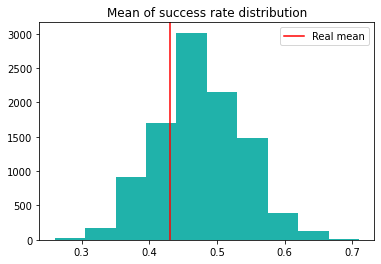

Mean of success rate differences p-value 0.2304


In [163]:
#Compare mean
plt.hist(means, color = 'lightseagreen')
plt.axvline(x = real_mean, color = 'r', label = 'Real mean')
plt.title('Mean of success rate distribution')
plt.legend()
plt.show()

p = np.mean(means < real_mean)
print('Mean of success rate differences p-value', p)

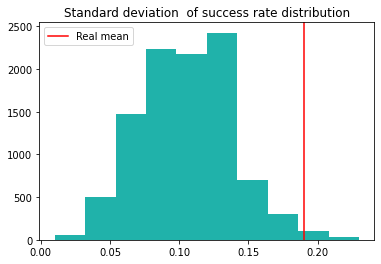

Standard deviation of success rate differences p-value 0.9865


In [164]:
#Compare standard deviation
plt.hist(stds, color = 'lightseagreen')
plt.axvline(x = real_std, color = 'r', label = 'Real mean')
plt.title('Standard deviation  of success rate distribution')
plt.legend()
plt.show()
p = np.mean(stds < real_std)
print('Standard deviation of success rate differences p-value', p)

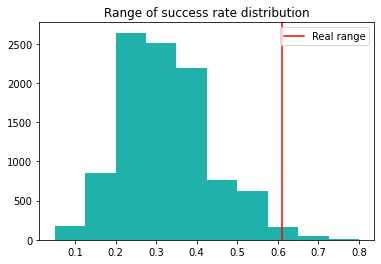

Range of success rate differences p-value 0.9901


In [167]:
#Compare range
plt.hist(max_ranges, color = 'lightseagreen')
plt.axvline(x = real_range, color = 'r', label = 'Real range')
plt.title('Range of success rate distribution')
plt.legend()
plt.show()
p = np.mean([x < real_range for x in max_ranges])
print('Range of success rate differences p-value', p)

The test statistic for standard deviation and range is 0.9865 and 0.9901. It showcases that though our model has an acceptable success rate estimate for the control group, it doesn't accurately capture the variance and range of the real-world scenario. It might be that our model is non-hierarchical. All in all, more fluctuation for different studies exists than our model in the real world. 